In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style = 'white')
import os
import tqdm

In [2]:
# Importing the clean data

path = os.path.join(os.getcwd(), 'clean_data\\clean_data_1.csv')

income_data = pd.read_csv(path)
income_data.head()


,age,education,edu_num,marital_status,sex,capital_gain,capital_loss,hours_worked,salary,source,...,native_country_ Mexico,native_country_ United-States,native_country_category_1,native_country_category_2,native_country_category_3,native_country_category_4,native_country_category_5,native_country_category_6,native_country_category_7,native_country_category_8
0,39,3,4,0,1,7.684784,0.0,3,0,train,...,0,1,0,0,0,0,0,0,0,0
1,50,3,4,1,1,0.000000,0.0,1,0,train,...,0,1,0,0,0,0,0,0,0,0
2,38,5,2,0,1,0.000000,0.0,3,0,train,...,0,1,0,0,0,0,0,0,0,0
3,53,6,1,1,1,0.000000,0.0,3,0,train,...,0,1,0,0,0,0,0,0,0,0
4,28,3,4,1,0,0.000000,0.0,3,0,train,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# splitting test data and train data

#For the train dataset
income_train_data = income_data[income_data['source'] == 'train'].drop(columns = ['source'])
X_train = income_train_data.drop(columns = ['salary'])
Y_train = income_train_data['salary']

# For the test dataset
income_test_data = income_data[income_data['source'] == 'test'].drop(columns = ['source'])
income_test_features = income_test_data.drop(columns = ['salary'])
income_test_target = income_test_data['salary']

# Model we shall be choosing

1. K Nearest Neighbour
2. Linear Discriminant Analysis
3. Support Vector Classifier
4. Multi-layer Perceptron classifier
5. Extra Trees Classifier
6. Logistic Regression
7. Decision Trees
8. Random Forest
9. Gradient Boosting Classifier
10. AdaBoost Classifier

In [6]:
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

## Appending the required models to a list as follows

In [5]:
random_seed = 37

# Making a list of our classifiers
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state = random_seed, probability=True))
classifiers.append(MLPClassifier(random_state = random_seed))
classifiers.append(ExtraTreesClassifier(random_state = random_seed))
classifiers.append(LogisticRegression(random_state = random_seed))
classifiers.append(DecisionTreeClassifier(random_state = random_seed))
classifiers.append(RandomForestClassifier(random_state = random_seed))
classifiers.append(GradientBoostingClassifier(random_state = random_seed))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_seed), random_state = random_seed))

## Evaluating Cross Validation Scores

In [5]:
# Crossvalidation with kfold
kfold = StratifiedKFold(n_splits = 10)

KNeighborsClassifier
LinearDiscriminantAnalysis
SVC
MLPClassifier
ExtraTreesClassifier
LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier
AdaBoostClassifier


In [17]:
cross_val_scores = []

cross_val_data = {'Algorithmn' : [], 
                'cross_val_mean' : [],
                'cross_val_std' : []}

for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y = Y_train, scoring = 'accuracy', cv = kfold, n_jobs =  5)
    cross_val_scores.append(scores)
    cross_val_data['Algorithmn'].append((classifier.__str__()).split('(')[0])
    cross_val_data['cross_val_mean'].append(scores.mean())
    cross_val_data['cross_val_std'].append(scores.std())
    print( f'The { (cross_val_data['Algorithmn'])[-1] } algorithmn has a mean score of { scores.mean() } of standard deviation { scores.std() }')

The  algorithmn has a mean score of 0.8311172251186069 of standard deviation 0.004816775141716295
The  algorithmn has a mean score of 0.8400848408907973 of standard deviation 0.004608340861561566
The  algorithmn has a mean score of 0.841743345838372 of standard deviation 0.00308759234700239
The  algorithmn has a mean score of 0.8537517190341877 of standard deviation 0.005849670602372691
The  algorithmn has a mean score of 0.8287831387923499 of standard deviation 0.006053875219771304
The  algorithmn has a mean score of 0.8414360696560573 of standard deviation 0.005124685223509553
The  algorithmn has a mean score of 0.8271862946486834 of standard deviation 0.006051550388619633
The  algorithmn has a mean score of 0.8437702125605103 of standard deviation 0.005785160023012569
The  algorithmn has a mean score of 0.8650228217583145 of standard deviation 0.004411216924675435
The  algorithmn has a mean score of 0.8390716196979631 of standard deviation 0.004867376202969213


## Analysing the performance of our models

Text(0.5, 1.0, 'Cross Validation Plot')

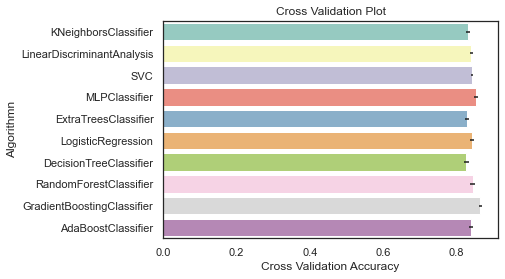

In [19]:

cross_val_dataframe = pd.DataFrame(cross_val_data)

g = sns.barplot('cross_val_mean', 'Algorithmn', data = cross_val_dataframe, orient = 'h', palette = 'Set3', **{'xerr' : cross_val_data['cross_val_std']})
g.set_xlabel('Cross Validation Accuracy')
g.set_title('Cross Validation Plot')

In [22]:
cross_val_dataframe.sort_values(by='cross_val_mean', ascending=False)

,Algorithmn,cross_val_mean,cross_val_std
8,GradientBoostingClassifier,0.865023,0.004411
3,MLPClassifier,0.853752,0.005850
7,RandomForestClassifier,0.843770,0.005785
2,SVC,0.841743,0.003088
5,LogisticRegression,0.841436,0.005125
1,LinearDiscriminantAnalysis,0.840085,0.004608
9,AdaBoostClassifier,0.839072,0.004867
0,KNeighborsClassifier,0.831117,0.004817
4,ExtraTreesClassifier,0.828783,0.006054
6,DecisionTreeClassifier,0.827186,0.006052


## Testing our best Classifier with the test data

In [25]:
# Training the model
clf = GradientBoostingClassifier(random_state = random_seed)
clf.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=37)

In [28]:
# Predicting using trained model
pred = clf.predict(income_test_features)
accuracy = (pred == income_test_target.values).sum() / len(pred)
print(f'The accuracy is {accuracy}')

The accuracy is 0.8687427062219766


# Tuning of Parameter of the 4 best models

1. GradientBoostingClassifier
1. MLPClassifier
1. RandomForestClassifier
1. SVC

In [30]:
random_seed = 37

## 1. GradientBoostingClassifier

The best classifier is found to be:

> GBC_grid = {
'loss' : 'deviance',
'learning_rate' : 0.05
'n_estimators' : 100
'criterion' : 'friedman_mse', 'mse', 'mae',
'max_depth' : 3
'min_impurity_decrease' : 0,
'max_features' : 'auto'
'verbose' : 1
'ccp_alpha' : 0
}

In [18]:
GBC = GradientBoostingClassifier()

# GBC_grid = {
#     'loss' : ['deviance', 'exponential'],
#     'learning_rate' : [0.5, 0.1, 0.05, 0.02, 0.001],
#     'n_estimators' : [50, 100, 200, 500, 1000],
#     'criterion' : ['friedman_mse', 'mse', 'mae'],
#     'max_depth' : [2, 3, 5, 8, 10],
#     'min_impurity_decrease' : [0, 0.01, 0.1],
#     'max_features' : ['auto', 'sqrt', 'log2'],
#     'verbose' : [0, 1],
#     'ccp_alpha' : [0, 0.001, 0.01, 0.1],
# }

GBC_grid = {
    'loss' : ['deviance'],
    'learning_rate' : [0.5],
    'n_estimators' : [100],
    'max_depth' : [3],
    'min_impurity_decrease' : [0],
    'max_features' : ['auto'],
    'verbose' : [1],
    'ccp_alpha' : [0],
}


grid_search =  GridSearchCV(GBC, GBC_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 3, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:  1.4min finished
      Iter       Train Loss   Remaining Time 
         1           0.8298            8.10s
         2           0.7485            6.21s
         3           0.7077            5.77s
         4           0.6751            5.77s
         5           0.6552            5.59s
         6           0.6397            5.33s
         7           0.6298            5.10s
         8           0.6214            4.93s
         9           0.6159            4.91s
        10           0.6112            5.09s
        20           0.5770            4.33s
        30           0.5631            3.70s
        40           0.5533            3.11s
        50           0.5464            2.61s
        60           0.5424            2.12s
        70           0.5374            1.56s
        80           0.5333 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1],
                         'learning_rate': [0.5], 'loss': ['deviance'],
                         'max_depth': [3], 'max_features': ['auto'],
                         'min_impurity_decrease': [0], 'n_estimators': [100],
                         'verbose': [1]},
             scoring='roc_auc', verbose=1)

In [32]:
# Testing the tuned model

clf = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.05, n_estimators = 100, max_depth = 3, min_impurity_decrease = 0, max_features = 'auto', verbose = 1, ccp_alpha = 0, random_state = random_seed)
clf.fit(X_train, Y_train)

pred = clf.predict(income_test_features)
accuracy = (pred == income_test_target.values).sum() / len(pred)
print(f'The accuracy is {accuracy}')


Iter       Train Loss   Remaining Time 
         1           1.0670            9.08s
         2           1.0351            9.24s
         3           1.0072            8.13s
         4           0.9825            7.87s
         5           0.9603            7.98s
         6           0.9405            7.73s
         7           0.9220            7.88s
         8           0.9052            7.91s
         9           0.8897            7.83s
        10           0.8755            7.67s
        20           0.7789            5.70s
        30           0.7256            4.75s
        40           0.6915            4.14s
        50           0.6685            3.44s
        60           0.6517            2.74s
        70           0.6394            2.05s
        80           0.6299            1.36s
        90           0.6221            0.68s
       100           0.6157            0.00s
The accuracy is 0.8647503224617652


In [33]:

# grid_search.best_estimator_
# grid_search.best_score_
grid_search.best_params_

{'ccp_alpha': 0,
 'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'auto',
 'min_impurity_decrease': 0,
 'n_estimators': 100,
 'verbose': 1}

## 2. MLPClassifier

The best estimator is found to be:

>MLP_grid = {
'activation' : 'identity', 'logistic', 'tanh', 'relu',
'solver' : 'lbfgs', 'sgd', 'adam',
'alpha' : 0.0001, 0.001, 0.01,
'learning_rate' : 'constant', 'invscaling', 'adaptive',
'momentum' : 0.99, 0.9, 0.5, 0.1,
'nesterovs_momentum' : True, False,
'beta_1' : 0.8, 0.85, 0.9, 0.95, 0.99,
'beta_2' : 0.99, 0.95, 0.99, 0.995, 0.999, 0.9999,
}



In [ ]:
MLP = MLPClassifier(random_state = random_seed)

# MLP_grid = {
#     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#     'solver' : ['lbfgs', 'sgd', 'adam'],
#     'alpha' : [0.0001, 0.001, 0.01],
#     'learning_rate' : ['constant', 'invscaling', 'adaptive'],
#     'momentum' : [0.99, 0.9, 0.5, 0.1],
#     'nesterovs_momentum' : [True, False],
#     'beta_1' : [0.8, 0.85, 0.9, 0.95, 0.99],
#     'beta_2' : [0.99, 0.95, 0.99, 0.995, 0.999, 0.9999],
# }

MLP_grid = {
    
}

grid_search =  GridSearchCV(MLP, MLP_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
grid_search.fit(X_train, Y_train)

## 3. RandomForestClassifier

The best estimator was found to be:

>RFC_grid = {
'n_estimators' : 25, 50, 150, 200,
'criterion' : "gini", "entropy",
'min_samples_split' : 2, 10, 20,
'max_features' : "auto", "sqrt", "log2",
'min_impurity_decrease' : 0, 0.1, 0.2,
'bootstrap' : True, False,
'oob_score' : True, False,
'class_weight' : "balanced", "balanced_subsample",
'ccp_alpha' : 0, 0.01, 0.001,
}


In [ ]:
RFC = RandomForestClassifier(random_state = random_seed)

# RFC_grid = {
#     'n_estimators' : [25, 50, 150, 200],
#     'criterion' : ["gini", "entropy"],
#     'min_samples_split' : [2, 10, 20],
#     'max_features' : ["auto", "sqrt", "log2"],
#     'min_impurity_decrease' : [0, 0.1, 0.2],
#     'bootstrap' : [True, False],
#     'oob_score' : [True, False],
#     'class_weight' : ["balanced", "balanced_subsample"],
#     'ccp_alpha' : [0, 0.01, 0.001],
# }

RFC_grid = {
    
}

grid_search =  GridSearchCV(RFC, RFC_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
grid_search.fit(X_train, Y_train)

## 4. SVC

The best estimator was found to be

>svc_grid = {
'kernel' : 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed',
'degree' : 3, 5, 8,
'gamma' : 'scale', 'auto',
'probability' : True, False,
'decision_function_shape' : 'ovo', 'ovr',
'break_ties' : True, False,
}

In [ ]:
svc = SVC(random_state = random_seed, probability=True)

# svc_grid = {
#     'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
#     'degree' : [3, 5, 8],
#     'gamma' : ['scale', 'auto'],
#     'probability' : [True, False],
#     'decision_function_shape' : ['ovo', 'ovr'],
#     'break_ties' : [True, False],
# }

svc_grid = {
    
}

grid_search =  GridSearchCV(svc, svc_grid, cv = kfold, scoring = 'roc_auc', n_jobs = 5, verbose = 1)
grid_search.fit(X_train, Y_train)

# Feature Importance Analysis



In [ ]:
GBC = GradientBoostingClassifier()
MLP = MLPClassifier(random_state = random_seed)
RFC = RandomForestClassifier(random_state = random_seed)
svc = SVC(random_state = random_seed)

In [6]:
random_seed = 37

classifier_dic = {
    'classifiers' : [
        GradientBoostingClassifier(),
        RandomForestClassifier(random_state = random_seed),
        RandomForestClassifier(random_state = random_seed),
        AdaBoostClassifier(DecisionTreeClassifier(random_state=random_seed), random_state = random_seed)

    ],
    'classifier_name' : [],
}

# Training and naming the classifier

for num, classifier in enumerate(classifier_dic['classifiers']):
    classifier_dic['classifier_name'].append((classifier.__str__()).split('(')[0])
    classifier_dic['classifiers'][num] = classifier.fit(X_train, Y_train)

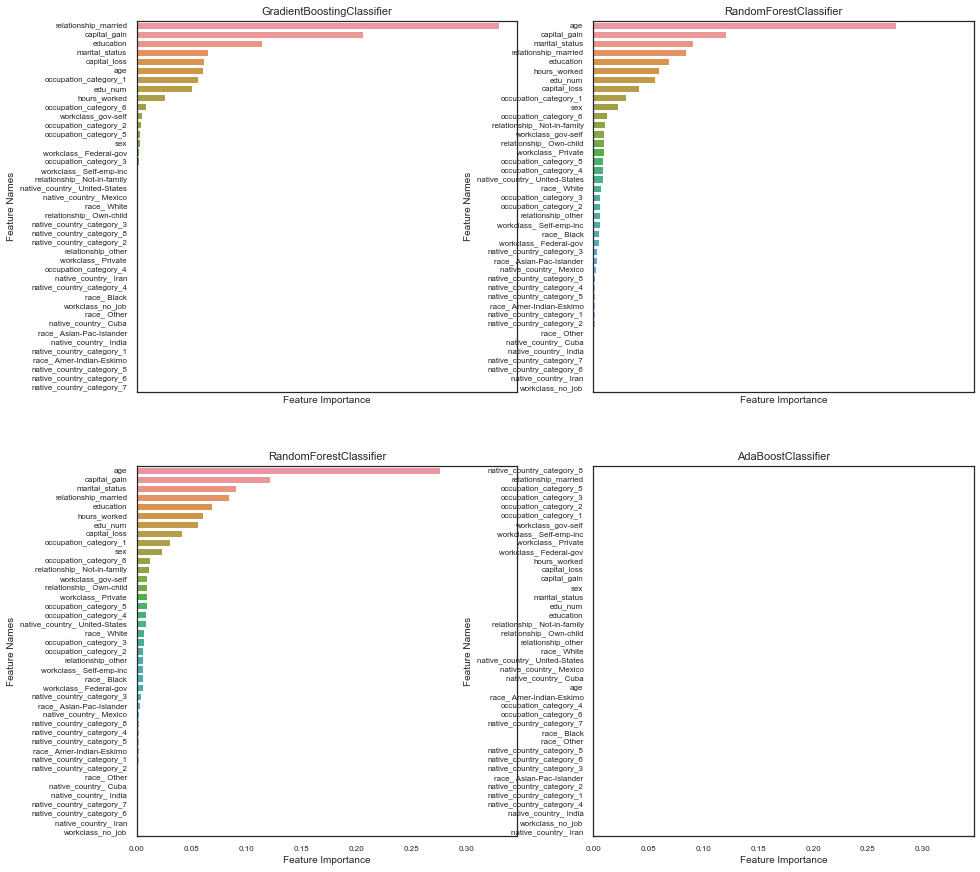

In [7]:
# For plotting

num_rows, num_cols = 2, 2

fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, sharex = True, figsize = (15, 15))

classifier_number = 0
for row in range(num_rows):
    for col in range(num_cols):
        classifier = classifier_dic['classifiers'][classifier_number]
        name = classifier_dic['classifier_name'][classifier_number]
        imp_features_pos = np.argsort(classifier.feature_importances_)[::-1]

        g = sns.barplot( 
            x = classifier.feature_importances_[imp_features_pos], y = X_train.columns[imp_features_pos], orient = 'h', ax = axes[row][col]
            )
        g.set_xlabel('Feature Importance', fontsize = 10)  
        g.set_ylabel('Feature Names', fontsize = 10)  
        g.set_title(f'{name}', fontsize = 11) 
        g.tick_params(labelsize = 8)

        classifier_number += 1 



# Final Combined Prediction

In [7]:
random_seed=37

In [8]:
combined_classifier = VotingClassifier(estimators = [ ('GradientBoostingClassifier', GradientBoostingClassifier()), ('MLPClassifier', MLPClassifier(random_state = random_seed)), ('RandomForestClassifier', RandomForestClassifier(random_state = random_seed)), ('SVC', SVC(random_state = random_seed, probability=True))], voting = 'soft' )

combined_classifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('GradientBoostingClassifier',
                              GradientBoostingClassifier()),
                             ('MLPClassifier', MLPClassifier(random_state=37)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(random_state=37)),
                             ('SVC', SVC(probability=True, random_state=37))],
                 voting='soft')

In [11]:
Y_pred = combined_classifier.predict(income_test_features)
accuracy = (Y_pred == income_test_target.values).sum() / len(Y_pred)
print(f'The accuracy is {accuracy}')

# Exporting to a cleaned data folder
curr_dir = os.getcwd()
path = os.path.join(curr_dir, 'predictions\\prediction_1.csv')
prediction = pd.Series(Y_pred, name = 'Prediction') 
prediction.to_csv(path, index = False, header = True)

The accuracy is 0.8611264664332657


In [ ]:
help(VotingClassifier)

In [6]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
print(classification_report(income_test_target.values, Y_pred))

precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



In [19]:
accuracy_score(income_test_target.values, Y_pred)

0.8611264664332657

In [16]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=